In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
[random.random() for _ in range(10)]

[0.5096282818823342,
 0.2581765289904241,
 0.177499800672838,
 0.33074616329638673,
 0.025954969170486453,
 0.15233832037782202,
 0.779863184249862,
 0.15258445558007117,
 0.5502861077078968,
 0.34201576576138926]

In [8]:
a = np.random.normal(size=1000)
ts = pd.Series(a)

<AxesSubplot:>

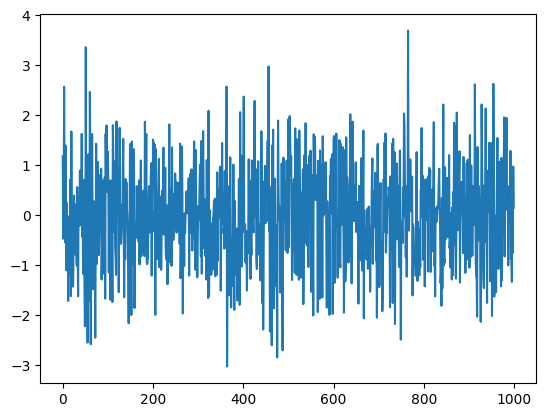

In [9]:
ts.plot()

<AxesSubplot:>

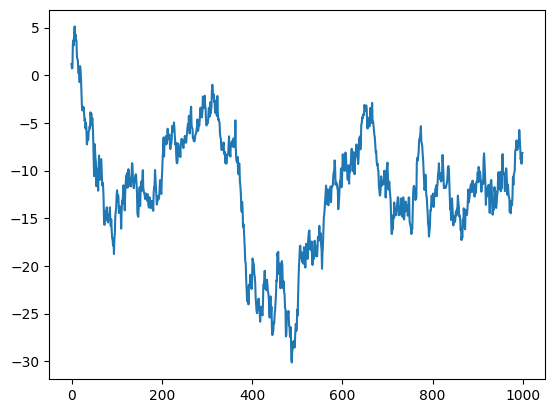

In [11]:
cs = ts.cumsum().dropna()
cs.plot()


<AxesSubplot:>

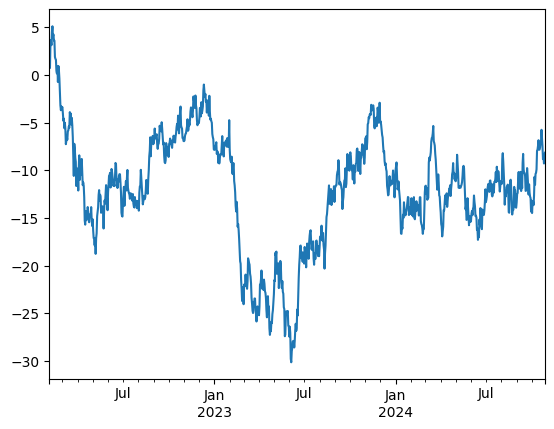

In [17]:
# create a time index from scratch
cs.index = pd.date_range(start='2022-02-02', end='2022-12-31', periods=1000)
cs.index = pd.date_range(start='2022-02-02', periods=1000, freq='1d')
cs.plot()

In [18]:
# select date ranges
cs['2023-06-01':]

2023-06-01   -27.437314
2023-06-02   -26.399411
2023-06-03   -27.065056
2023-06-04   -29.765421
2023-06-05   -30.130595
                ...    
2024-10-24    -8.812457
2024-10-25    -8.529494
2024-10-26    -9.278585
2024-10-27    -8.301572
2024-10-28    -8.151400
Freq: D, Length: 516, dtype: float64

In [19]:
# access fields
cs.index.year

Int64Index([2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,
            ...
            2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
           dtype='int64', length=1000)

In [22]:
# resampling => like a time series version of group by
cs.resample('1m').median()

2022-02-28     0.947839
2022-03-31    -5.812476
2022-04-30   -13.851994
2022-05-31   -14.179862
2022-06-30   -11.173980
2022-07-31   -12.550936
2022-08-31   -11.687876
2022-09-30    -7.104386
2022-10-31    -6.570818
2022-11-30    -4.736173
2022-12-31    -3.696204
2023-01-31    -7.542453
2023-02-28   -13.862113
2023-03-31   -23.355777
2023-04-30   -23.785399
2023-05-31   -22.348584
2023-06-30   -26.243870
2023-07-31   -18.369057
2023-08-31   -14.580554
2023-09-30   -11.243656
2023-10-31    -9.208456
2023-11-30    -4.552344
2023-12-31   -10.606766
2024-01-31   -13.901847
2024-02-29   -14.262057
2024-03-31    -9.880036
2024-04-30   -12.642024
2024-05-31   -11.810774
2024-06-30   -14.657240
2024-07-31   -11.431857
2024-08-31   -12.225129
2024-09-30   -11.479459
2024-10-31    -8.415533
Freq: M, dtype: float64

<AxesSubplot:>

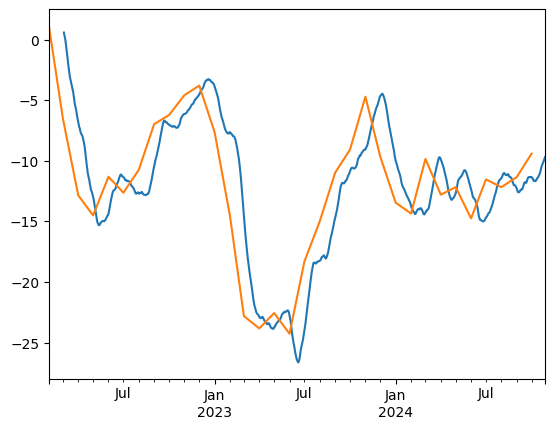

In [24]:
# rolling mean / moving average
cs.rolling(window=30).mean().plot()
cs.resample('1m').mean().plot()